### Labour Force

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import panel as pn

from pathlib import Path
import plotly.express as px
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox

import geopandas as gpd
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html

import re

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_42578/2086485314.py:20: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_42578/2086485314.py:21: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
cwd = Path.cwd()
labor_data_2019_path = (cwd/"project_data/2019-29"/"labor-force.xlsx").resolve()
labor_data_2023_path = (cwd/"project_data/2023-33"/"labor-force.xlsx").resolve()

In [3]:
labour_data_2019 = pd.read_excel(labor_data_2019_path, sheet_name=3,skiprows=1,header=0)
labour_data_2019 = labour_data_2019.drop(labour_data_2019.tail(6).index)
labour_data_2019.columns = ["Labour_Participation_age", "Participation rate, 1999", "Participation rate, 2009", "Participation rate, 2019",\
    "Participation rate, 2029","Participation rate change, 1999-09","Participation rate change, 2009-19","Participation rate change, 2019-29",\
        "Annual growth rate, 1999-09","Annual growth rate, 2009-19","Annual growth rate, 2019-29" ]
labour_data_2019= labour_data_2019.iloc[1:,:]
labour_data_2019.head()

,Labour_Participation_age,"Participation rate, 1999","Participation rate, 2009","Participation rate, 2019","Participation rate, 2029","Participation rate change, 1999-09","Participation rate change, 2009-19","Participation rate change, 2019-29","Annual growth rate, 1999-09","Annual growth rate, 2009-19","Annual growth rate, 2019-29"
1,"Total, 16 years and older",67.1,65.4,63.1,61.2,-1.7,-2.3,-1.9,-0.3,-0.4,-0.3
2,16 to 24,65.5,56.9,55.9,51.3,-8.6,-1,-4.6,-1.4,-0.2,-0.8
3,16 to 19,52,37.5,35.3,28.5,-14.5,-2.2,-6.9,-3.2,-0.6,-2.1
4,20 to 24,77.5,72.9,72.2,69,-4.6,-0.8,-3.1,-0.6,-0.1,-0.4
5,25 to 54,84.1,82.6,82.5,81.8,-1.5,-0.1,-0.7,-0.2,0,-0.1


In [4]:
labour_data_2023 = pd.read_excel(labor_data_2023_path, sheet_name=3,skiprows=1,header=0)
labour_data_2023 = labour_data_2023.drop(labour_data_2023.tail(6).index)
labour_data_2023.head()

,Group,"Participation rate, 2003","Participation rate, 2013","Participation rate, 2023","Participation rate, 2033","Participation rate change, 2003-13","Participation rate change, 2013-23","Participation rate change, 2023-33","Compound annual rate of change, 2003-13","Compound annual rate of change, 2013-23","Compound annual rate of change, 2023-33"
0,"Total, 16 years and older",66.2,63.2,62.6,61.2,-3.0,-0.6,-1.4,-0.5,-0.1,-0.2
1,16 to 24,61.6,55.1,56.2,53.9,-6.5,1.2,-2.4,-1.1,0.2,-0.4
2,16 to 19,44.5,34.5,36.9,34.3,-10.1,2.5,-2.6,-2.5,0.7,-0.7
3,20 to 24,75.4,70.7,71.3,69.1,-4.7,0.6,-2.2,-0.6,0.1,-0.3
4,25 to 54,83,81,83.3,82.6,-2.0,2.3,-0.7,-0.2,0.3,-0.1


In [5]:
barplot_2019 = labour_data_2019.iloc[:12,:5]
barplot_2019.set_index('Labour_Participation_age', inplace=True)
barplot_2019 = barplot_2019.iloc[[2,3,5,6,7,9,10,11],:]

barplot_2023 = labour_data_2023.iloc[:12,:5]
barplot_2023.columns =['Labour_Participation_age', 'Participation rate, 2003', 'Participation rate, 2013',
       'Participation rate, 2023', 'Participation rate, 2033']
barplot_2023['Labour_Participation_age'] = barplot_2023['Labour_Participation_age'].str.strip()
barplot_2023.set_index('Labour_Participation_age', inplace=True)
barplot_2023 = barplot_2023.iloc[[2,3,5,6,7,9,10,11],:]

merged_labor_data = pd.concat([barplot_2019, barplot_2023], axis=1)
merged_labor_data

,"Participation rate, 1999","Participation rate, 2009","Participation rate, 2019","Participation rate, 2029","Participation rate, 2003","Participation rate, 2013","Participation rate, 2023","Participation rate, 2033"
Labour_Participation_age,,,,,,,,
16 to 19,52,37.5,35.3,28.5,44.5,34.5,36.9,34.3
20 to 24,77.5,72.9,72.2,69,75.4,70.7,71.3,69.1
25 to 34,84.6,82.7,82.9,81.9,82.9,81.2,83.8,82.9
35 to 44,84.9,83.7,83.1,82.2,83.9,82.2,83.8,82.8
45 to 54,82.6,81.6,81.4,81.3,82.1,79.7,82.1,82
55 to 64,59.3,64.9,65.3,68.7,62.4,64.4,65.8,69.1
65 to 74,18.3,25.6,27.8,33.2,21.4,26.7,26.9,30.4
75 and older,5.1,7.3,9.1,11.8,5.8,7.9,8.3,10.1


In [6]:

year_columns = [col for col in merged_labor_data.columns if re.search(r'\d{4}', col)]
sorted_year_columns = sorted(year_columns, key=lambda x: int(re.search(r'\d{4}', x).group()))

sorted_columns = sorted_year_columns
merged_labor_data_sorted = merged_labor_data[sorted_columns]

merged_labor_data_sorted.head()

,"Participation rate, 1999","Participation rate, 2003","Participation rate, 2009","Participation rate, 2013","Participation rate, 2019","Participation rate, 2023","Participation rate, 2029","Participation rate, 2033"
Labour_Participation_age,,,,,,,,
16 to 19,52,44.5,37.5,34.5,35.3,36.9,28.5,34.3
20 to 24,77.5,75.4,72.9,70.7,72.2,71.3,69,69.1
25 to 34,84.6,82.9,82.7,81.2,82.9,83.8,81.9,82.9
35 to 44,84.9,83.9,83.7,82.2,83.1,83.8,82.2,82.8
45 to 54,82.6,82.1,81.6,79.7,81.4,82.1,81.3,82


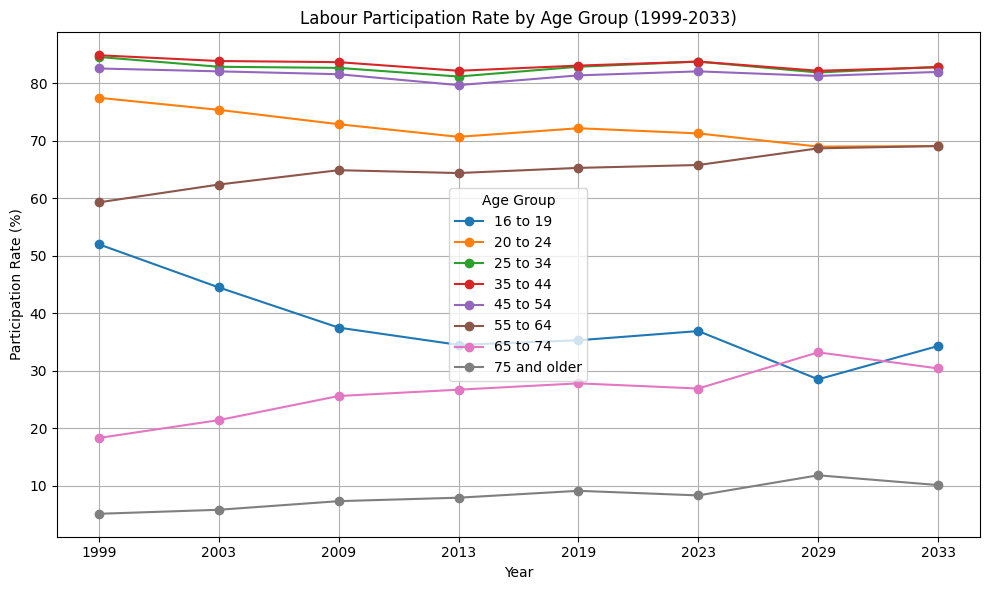

In [7]:
# Step 2: Plotting the graph
plt.figure(figsize=(10, 6))

# Plot each age group's participation rate from merged_labor_data_sorted
for age_group in merged_labor_data_sorted.index:
    plt.plot(merged_labor_data_sorted.columns, merged_labor_data_sorted.loc[age_group], marker='o', label=age_group)

# Adding labels and title
plt.title('Labour Participation Rate by Age Group (1999-2033)')
plt.xlabel('Year')
plt.ylabel('Participation Rate (%)')

# Set x-axis ticks to the years (i.e., extract years from column names)
years = [re.search(r'\d{4}', col).group() for col in merged_labor_data_sorted.columns]
plt.xticks(merged_labor_data_sorted.columns, years)  # Only show year on x-axis labels

plt.grid(True)

# Display legend with age groups
plt.legend(title='Age Group')

# Display the plot
plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
import re

fig = go.Figure()

for age_group in merged_labor_data_sorted.index:
    fig.add_trace(go.Scatter(
        x=merged_labor_data_sorted.columns,
        y=merged_labor_data_sorted.loc[age_group],
        mode='lines+markers+text',
        name=age_group
    ))

fig.update_layout(
    title='Labour Participation Rate by Age Group (1999-2033)',
    xaxis_title='Year',
    yaxis_title='Participation Rate (%)',
    xaxis=dict(
        tickmode='array',
        tickvals=merged_labor_data_sorted.columns,
        ticktext=[re.search(r'\d{4}', col).group() for col in merged_labor_data_sorted.columns]
    ),
    showlegend=True,
    template='plotly_dark',
    title_x=0.5,
    height=600,
    width=1000  
)

fig.show()

In [9]:
men_labour_data_2019 = labour_data_2019.iloc[14:26,:5]
men_labour_data_2019.set_index('Labour_Participation_age', inplace=True)
women_labour_data_2019 = labour_data_2019.iloc[27:39,:5]
women_labour_data_2019.set_index('Labour_Participation_age', inplace=True)
men_labour_data_2019

,"Participation rate, 1999","Participation rate, 2009","Participation rate, 2019","Participation rate, 2029"
Labour_Participation_age,,,,
16 to 24,68,58.5,56.6,50.6
16 to 19,52.9,37.3,34.9,27.3
20 to 24,81.9,76.2,74,68.9
25 to 54,91.7,89.7,89.1,87.3
25 to 34,93.3,90.3,89.1,86.7
35 to 44,92.8,91.7,90.8,89.2
45 to 54,88.8,87.4,87.4,85.8
55 and older,39.6,46.3,46.3,44.2
55 to 64,67.9,70.2,71.5,72.4


In [10]:
women_labour_data_2019

,"Participation rate, 1999","Participation rate, 2009","Participation rate, 2019","Participation rate, 2029"
Labour_Participation_age,,,,
16 to 24,62.9,55.2,55.1,52
16 to 19,51,37.7,35.7,29.6
20 to 24,73.2,69.6,70.4,69.1
25 to 54,76.8,75.6,76,76.4
25 to 34,76.4,75,76.7,77.1
35 to 44,77.2,75.9,75.7,75.1
45 to 54,76.7,76,75.7,77
55 and older,25.6,34.7,35,35.5
55 to 64,51.5,60,59.6,65.2
